In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




In [7]:
data=pd.read_csv("C:\\Users\\Roshini\\OneDrive\\Documents\\Desktop\\train_accidents_combined.csv")
print(data.head())

   Passenger_ID  Accident_ID  Age  Gender  Unnamed: 4     Class  Unnamed: 6  \
0             1           23   35  Female         NaN  Business         NaN   
1             2           85   65    Male         NaN  Business         NaN   
2             3           19   47    Male         NaN  Business         NaN   
3             4           19   78    Male         NaN  Business         NaN   
4             5           36    3    Male         NaN   Economy         NaN   

   Survival_Status Injury_Severity        Date Location  Train_Speed_kmh  \
0                0             NaN  03-06-2020   City D               71   
1                0             NaN  11-08-2021   City D              130   
2                1           Minor  06-05-2020   City C               87   
3                0          Severe  06-05-2020   City C               87   
4                0           Minor  02-09-2020   City B              122   

   Unnamed: 12               Cause  
0          NaN         Human Er

In [8]:
data.shape

(1000, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Passenger_ID     1000 non-null   int64  
 1   Accident_ID      1000 non-null   int64  
 2   Age              1000 non-null   int64  
 3   Gender           1000 non-null   object 
 4   Unnamed: 4       0 non-null      float64
 5   Class            1000 non-null   object 
 6   Unnamed: 6       0 non-null      float64
 7   Survival_Status  1000 non-null   int64  
 8   Injury_Severity  690 non-null    object 
 9   Date             1000 non-null   object 
 10  Location         1000 non-null   object 
 11  Train_Speed_kmh  1000 non-null   int64  
 12  Unnamed: 12      0 non-null      float64
 13  Cause            1000 non-null   object 
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [10]:
data.isnull().sum()

Passenger_ID          0
Accident_ID           0
Age                   0
Gender                0
Unnamed: 4         1000
Class                 0
Unnamed: 6         1000
Survival_Status       0
Injury_Severity     310
Date                  0
Location              0
Train_Speed_kmh       0
Unnamed: 12        1000
Cause                 0
dtype: int64

In [11]:
data.isnull().sum()

Passenger_ID          0
Accident_ID           0
Age                   0
Gender                0
Unnamed: 4         1000
Class                 0
Unnamed: 6         1000
Survival_Status       0
Injury_Severity     310
Date                  0
Location              0
Train_Speed_kmh       0
Unnamed: 12        1000
Cause                 0
dtype: int64

In [16]:
data=data.drop(columns='Unnamed: 6',axis=1)

In [17]:
data.isnull().sum()

Passenger_ID         0
Accident_ID          0
Age                  0
Gender               0
Class                0
Survival_Status      0
Injury_Severity    310
Date                 0
Location             0
Train_Speed_kmh      0
Cause                0
dtype: int64

In [20]:
# Convert column to numeric, coercing errors to NaN
data['Injury_Severity'] = pd.to_numeric(data['Injury_Severity'], errors='coerce')

# Fill missing values with the mean of the column
data['Injury_Severity'].fillna(data['Injury_Severity'].mean(), inplace=True)


In [21]:
data.isnull().sum()

Passenger_ID          0
Accident_ID           0
Age                   0
Gender                0
Class                 0
Survival_Status       0
Injury_Severity    1000
Date                  0
Location              0
Train_Speed_kmh       0
Cause                 0
dtype: int64

In [22]:
data=data.drop(columns='Injury_Severity',axis=1)

In [23]:
data.isnull().sum()

Passenger_ID       0
Accident_ID        0
Age                0
Gender             0
Class              0
Survival_Status    0
Date               0
Location           0
Train_Speed_kmh    0
Cause              0
dtype: int64

In [24]:
data.describe()

,Passenger_ID,Accident_ID,Age,Survival_Status,Train_Speed_kmh
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,50.250000,38.986000,0.613000,120.113000
std,288.819436,29.188379,22.694511,0.487307,42.318472
min,1.000000,1.000000,1.000000,0.000000,51.000000
25%,250.750000,25.000000,19.000000,0.000000,86.000000
50%,500.500000,49.000000,38.000000,1.000000,120.000000
75%,750.250000,76.000000,58.250000,1.000000,153.000000
max,1000.000000,100.000000,79.000000,1.000000,199.000000


In [25]:
data['Survival_Status'].value_counts()

Survival_Status
1    613
0    387
Name: count, dtype: int64

In [26]:
sns.set()

<Axes: xlabel='count', ylabel='Survival_Status'>

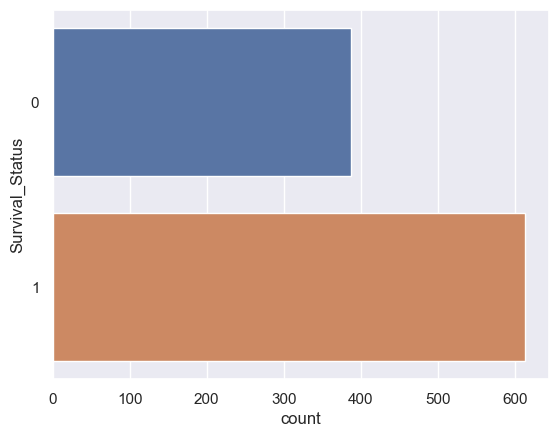

In [27]:
sns.countplot(y='Survival_Status', data=data)


In [28]:
data['Gender'].value_counts()

Gender
Female    515
Male      485
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Gender'>

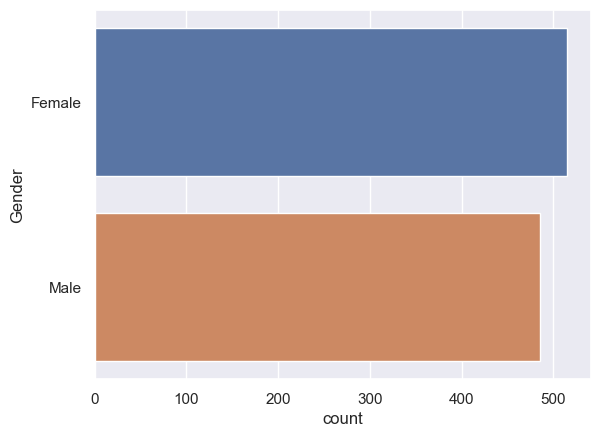

In [29]:
sns.countplot(y='Gender', data=data)

<Axes: xlabel='Gender', ylabel='count'>

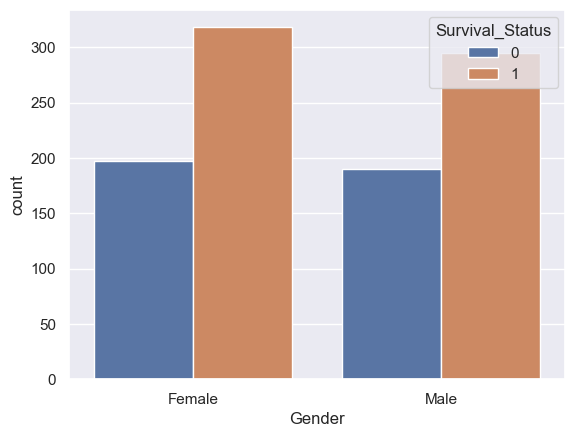

In [47]:
data['Gender'] = data['Gender'].astype(str)
data['Survival_Status'] = data['Survival_Status'].astype(str)
sns.countplot(x='Gender', hue='Survival_Status', data=data)



<Axes: xlabel='Location', ylabel='count'>

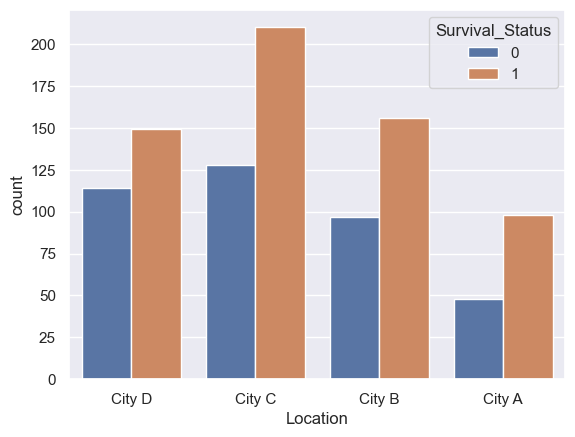

In [48]:
sns.countplot(x='Location', hue='Survival_Status', data=data)


In [49]:
data['Gender'].value_counts()

Gender
Female    515
Male      485
Name: count, dtype: int64

In [50]:
data['Location'].value_counts()

Location
City C    338
City D    263
City B    253
City A    146
Name: count, dtype: int64

In [51]:
data.replace({'Gender': {'Male': 0, 'Female': 1}, 
              'Location': {'City A': 0, 'City B': 1, 'City C': 2, 'City D': 3}, 
              'Class': {'Business': 1, 'Economy': 0}}, 
             inplace=True)


In [52]:
data.head()

,Passenger_ID,Accident_ID,Age,Gender,Class,Survival_Status,Date,Location,Train_Speed_kmh,Cause
0,1,23,35,1,1,0,03-06-2020,3,71,Human Error
1,2,85,65,0,1,0,11-08-2021,3,130,Collision
2,3,19,47,0,1,1,06-05-2020,2,87,Mechanical Failure
3,4,19,78,0,1,0,06-05-2020,2,87,Mechanical Failure
4,5,36,3,0,0,0,02-09-2020,1,122,Mechanical Failure


In [53]:
x=data.drop(columns=['Accident_ID',"Date","Train_Speed_kmh","Cause","Passenger_ID","Survival_Status"],axis=1)

y=data["Survival_Status"]

In [54]:
print(x)

     Age  Gender  Class  Location
0     35       1      1         3
1     65       0      1         3
2     47       0      1         2
3     78       0      1         2
4      3       0      0         1
..   ...     ...    ...       ...
995   48       0      1         3
996    7       1      0         2
997   74       0      0         1
998    7       1      1         0
999   33       1      1         1

[1000 rows x 4 columns]


In [55]:
print(y)

0      0
1      0
2      1
3      0
4      0
      ..
995    1
996    1
997    1
998    1
999    1
Name: Survival_Status, Length: 1000, dtype: object


In [56]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=2 )

In [57]:
print(x.shape,x_train.shape,x_test.shape)

(1000, 4) (750, 4) (250, 4)


In [58]:
model=LogisticRegression()

In [59]:
model.fit(x_train,y_train)

LogisticRegression()

In [60]:
x_train_prediction=model.predict(x_train)


In [61]:
print(x_train_prediction)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1

In [62]:
training_data_accuracy=accuracy_score(y_train,x_train_prediction)
print("accuracy score of training data:",training_data_accuracy)

accuracy score of training data: 0.6053333333333333


In [63]:
x_test_prediction=model.predict(x_test)

In [64]:
print(x_test_prediction)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1

In [65]:
test_data_accuracy=accuracy_score(y_test,x_test_prediction)
print("accuracy score of testing data:",test_data_accuracy)

accuracy score of testing data: 0.636
